# 課題7 クラスタリング

配点
- Q1 1P
- Q2.1 2P
- Q2.2 2P
- Q2.3 4P
- Q2.4 1P

In [3]:
# モジュールのインポート
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlibで日本語表示用のフォント
from matplotlib import font_manager
fp = font_manager.FontProperties(fname="ipag.ttf")

`pip install`でモジュールインストールできる人は以下で`japanmap`モジュールをインストールして`import`すると`matplotlib`を日本語化できます。

In [ ]:
#pip install japanmap

In [ ]:
#import japanmap as jm

## Q1 階層化クラスタリング
以下では、都道府県の気象データについて都道府県間の類似度（距離）に基づき都道府県を階層化クラスタリングすることを考えます。気象データは都道府県ごとの2018年度の年平均気温（℃）と年間降水量（mm）からなり、以下の政府統計ポータルサイトe-Statから取得しました。

[都道府県・市区町村のすがた（社会・人口統計体系）](https://www.e-stat.go.jp/regional-statistics/ssdsview/prefectures)

In [4]:
# 気象データファイルの読み込み（年平均気温: Temp、年間降水量: Rain）
weather_df = pd.read_excel('weather.xlsx', header=4, usecols=[0,2,3],  skiprows=[5], skipfooter=4, names=['Pref','Temp','Rain']) 
weather_df

,Pref,Temp,Rain
0,北海道,9.5,1282.0
1,青森県,11.0,1553.0
2,岩手県,11.0,1322.0
3,宮城県,13.6,1082.0
4,秋田県,12.3,2016.5
5,山形県,12.6,1124.0
6,福島県,14.2,828.0
7,茨城県,15.3,1282.5
8,栃木県,15.2,1257.0
9,群馬県,16.1,1046.5


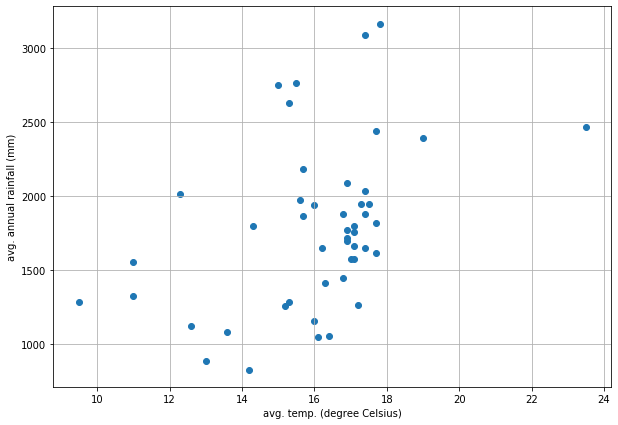

In [5]:
# 散布図
plt.figure(figsize=(10,7))
plt.scatter(weather_df['Temp'], weather_df['Rain'])
plt.xlabel('avg. temp. (degree Celsius)')
plt.ylabel('avg. annual rainfall (mm)')
plt.grid(True);

階層化クラスタリングには`SciPy`の階層化クラスタリングモジュール（`scipy.cluster.hierarchy`）を用います。

`linkage`関数は、特徴量ベクトルを行とする行列を入力とし、`metric`引数で指定した距離尺度と`method`引数で指定した距離計算方法で階層化クラスタリングを行い、特徴量ベクトル間のクラスタリングの過程を行列として返します。

- metric引数に指定できる距離尺度: cosine, euclidean, jaccard, hamming, correlation, mahalanobis, など
[linkage関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

- method引数に指定できる距離計算方法: single, complete, average, ward, など
[距離計算方法](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist)

以下では、標準化された都道府県の気象データの2次元配列を`linkage`関数の入力として指定しています。

`dendrogram`関数は、`linkage`関数が出力したクラスタリング過程を表す行列を入力として、クラスタリングの過程をデンドログラムとして可視化します。`labels`引数には各特徴量ベクトル（各都道府県の平均気温と降水量のベクトル）に付与するラベルのリストを指定します。

In [6]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [7]:
X = weather_df[['Temp', 'Rain']].values # データフレーム から配列に変換
X = (X-X.mean(axis=0))/X.std(axis=0) # 標準化

prefs = weather_df['Pref'].values # 都道府県名ラベル

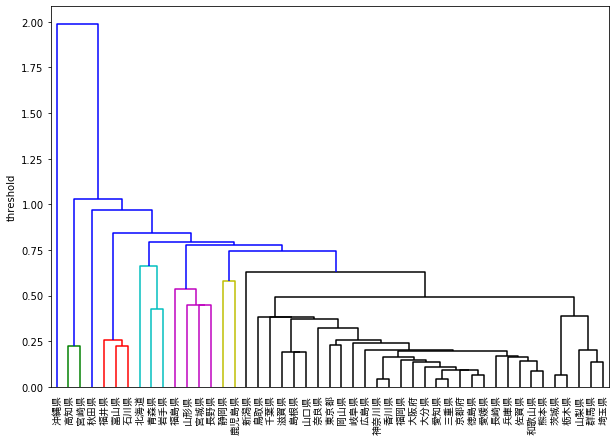

In [11]:
# 距離計算方法single
clusters = linkage(X, metric = 'euclidean', method = 'single')

plt.figure(figsize=(10,7))
dendrogram(clusters, labels=prefs,  color_threshold=0.7)
for l in plt.gca().get_xticklabels(): l.set_fontproperties(fp) #ラベル日本語化
plt.ylabel('threshold');

距離計算方法を`complete`や`average`に変更して階層化クラスタリングを行い得られるクラスタがどのように変化するか、それぞれのデンドログラムを可視化して観察してください。`denderogram`の`color_thereshold`の値を変えることで異なるクラスタ数でクラスタリング結果が色分けされます。

In [ ]:
# 距離計算方法complete
...

In [ ]:
# 距離計算方法average
...

### 参考
`linkage`関数には、以下のように特徴量ベクトル間の距離を表す行列を入力することもできます。`pdist`関数は`metric`引数で指定した距離尺度で特徴量ベクトル間の距離を計算し、それらの距離を要素とする行列（正確には行列の上半分をベクトルにしたもの）を返します。距離行列を`linkage`関数の入力とした場合は、`linkage`関数で距離尺度を指定する必要はありません。

[pdist関数](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)

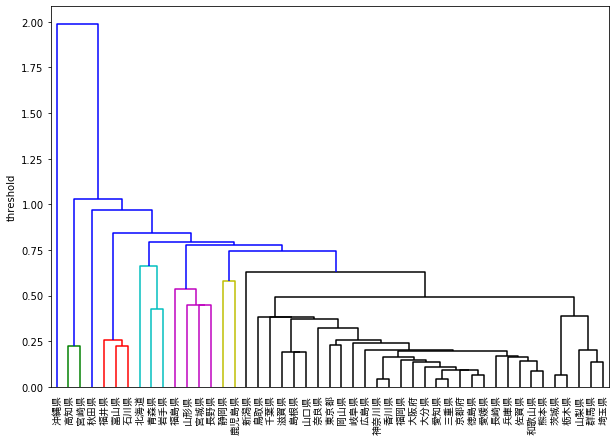

In [12]:
from scipy.spatial.distance import pdist

# 階層化クラスタリング
# 距離尺度を'euclidean'、距離計算は'single'
clusters = linkage(pdist(X, metric='euclidean'), method='single')

# デンドログラム
plt.figure(figsize=(10,7))
dendrogram(clusters, labels=prefs,  color_threshold=0.7)
for l in plt.gca().get_xticklabels(): l.set_fontproperties(fp) #ラベル日本語化
plt.ylabel('threshold');

In [13]:
from scipy.spatial.distance import squareform

# 距離行列
dist_matrix = pd.DataFrame(squareform(pdist(X, metric='euclidean')), columns=prefs, index=prefs)
dist_matrix

,北海道,青森県,岩手県,宮城県,秋田県,山形県,福島県,茨城県,栃木県,群馬県,...,愛媛県,高知県,福岡県,佐賀県,長崎県,熊本県,大分県,宮崎県,鹿児島県,沖縄県
北海道,0.000000,0.827093,0.664314,1.841703,1.828107,1.395049,2.230728,2.552896,2.509301,2.937099,...,3.476308,4.813317,3.661426,3.645189,3.742800,3.729513,3.417708,5.035887,4.656808,6.537396
青森県,0.827093,0.000000,0.424643,1.435032,1.026348,1.057303,1.939094,1.956895,1.927065,2.430226,...,2.721999,3.993057,2.951380,2.879265,2.989903,2.952844,2.692546,4.215068,3.847893,5.754106
岩手県,0.664314,0.424643,0.000000,1.226499,1.399050,0.792745,1.675864,1.894056,1.852506,2.301208,...,2.823076,4.304455,2.998481,2.996051,3.088405,3.085482,2.757147,4.524126,4.037855,5.892446
宮城県,1.841703,1.435032,1.226499,0.000000,1.810663,0.446875,0.536435,0.834113,0.774244,1.102319,...,2.024455,4.056716,2.055221,2.221111,2.258804,2.344288,1.874560,4.256174,3.390113,5.049127
秋田県,1.828107,1.026348,1.399050,1.810663,0.000000,1.645970,2.339385,1.887916,1.891724,2.444812,...,2.151100,2.991908,2.487704,2.259388,2.403850,2.292016,2.210420,3.215179,3.030851,4.999569
山形県,1.395049,1.057303,0.792745,0.446875,1.645970,0.000000,0.889968,1.223613,1.170227,1.547114,...,2.334834,4.190267,2.420826,2.525818,2.584715,2.638179,2.214701,4.398876,3.662190,5.397731
福島県,2.230728,1.939094,1.675864,0.536435,2.339385,0.889968,0.000000,0.965649,0.903140,0.927750,...,2.190674,4.394615,2.115877,2.387973,2.388597,2.523429,1.996355,4.583281,3.575282,5.085445
茨城県,2.552896,1.956895,1.894056,0.834113,1.887916,1.223613,0.965649,0.000000,0.064302,0.558751,...,1.233084,3.453291,1.222304,1.431333,1.447705,1.563840,1.056862,3.635681,2.617189,4.217594
栃木県,2.509301,1.927065,1.852506,0.774244,1.891724,1.170227,0.903140,0.064302,0.000000,0.553771,...,1.297289,3.510365,1.284057,1.495552,1.511881,1.627912,1.120898,3.693784,2.681278,4.279548
群馬県,2.937099,2.430226,2.301208,1.102319,2.444812,1.547114,0.927750,0.558751,0.553771,0.000000,...,1.447266,3.804399,1.263257,1.630399,1.588403,1.772377,1.215773,3.970144,2.791525,4.177532


## scikit-learnライブラリ
`scikit-learn`ライブラリには分類、回帰、クラスタリング、次元削減、前処理、モデル選択などの機械学習の処理を行うためのモジュールが含まれています。以下では、`scikit-learn`ライブラリの`KMeans`クラスを使ったk-means法によるクラスタリングについて説明します。

機械学習では、観察されたデータをよく表すようにモデルのパラメータの調整を行います。パラメータを調整することでモデルをデータに適合させるので、「学習」と呼ばれます。特に、観測されたデータの特徴のみからそのデータセットの構造やパターンをよく表すようなモデルを学習することを**教師なし学習**と呼びます。クラスタリングは教師なし学習の例です。クラスタリングでは、観測されたデータをクラスタと呼ばれる集合にグループ分けします。

`scikit-learn`ライブラリには機械学習に用いる代表的なデータセットが含まれています。以下では、`load_iris`関数により`iris`データセットをロードしています。`iris`データセットにはアヤメの花を4つの特徴量（'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'）で表した150個の特徴量ベクトルが含まれています（`iris['data']`)。また、各花には3種類（0:'setosa', 1:'versicolor', 2:'virginica'）のいずれかがラベルとして付与されています（`iris['target']`)


`iris['data']`行列の各行は1つの花の特徴量ベクトルに対応しており、行数はデータの総数（この場合は150）を表します。1列目から4列目までの各列は上記の特徴量に対応しています。`scikit-learn`では、この特徴量ベクトルからなる行列を`NumPy`配列または`pandas`のデータフレームに格納し、入力データとして処理します。

In [14]:
from sklearn.datasets import load_iris
iris = load_iris() # データセットのロード
print(len(iris['data'])) # データの総数
print(iris['feature_names']) # 特徴量名
print(iris['data'][0:5]) # データ（先頭5行を表示）
print(iris['target_names']) # ラベル名
print(iris['target'][0:5], iris['target'][50:55], iris['target'][100:105]) # ラベル

150
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0] [1 1 1 1 1] [2 2 2 2 2]


`iris['data']`の3列目と4列目の2つの特徴量（'petal length (cm)', 'petal width (cm)'）を用いて散布図でデータを可視化してみます。

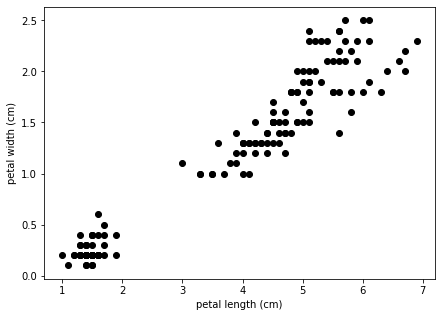

In [15]:
X_iris=iris['data'][:,2:4]
plt.figure(figsize=(7,5))
plt.xlabel(iris["feature_names"][2])
plt.ylabel(iris["feature_names"][3])
plt.scatter(X_iris[:,0],X_iris[:,1],c='black');

アヤメの種類（0:'setosa', 1:'versicolor', 2:'virginica'）ごとに色を変えて同様にデータを可視化してみると、種類ごとにグループになっており、アヤメの種類ごとに似た特徴量を持っていることがわかります。以下では、クラスタリングによりこれらのグループをクラスタとして自動的に抽出することを考えます。

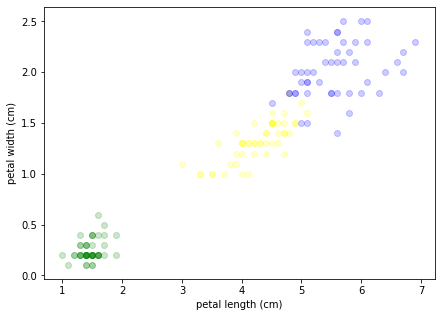

In [16]:
labels=iris['target']
plt.figure(figsize=(7,5))
plt.xlabel(iris["feature_names"][2])
plt.ylabel(iris["feature_names"][3])
plt.scatter(X_iris[labels==0,0],X_iris[labels==0,1],c='green', alpha=0.2)
plt.scatter(X_iris[labels==1,0],X_iris[labels==1,1],c='yellow', alpha=0.2)
plt.scatter(X_iris[labels==2,0],X_iris[labels==2,1],c='blue', alpha=0.2);

`scikit-learn`では、以下の手順でデータからモデルの学習を行います。
- 使用するモデルのクラスの選択
- モデルのハイパーパラメータの選択とインスタンス化
- データの準備
    - 教師なし学習では、特徴量データを準備
- モデルをデータに適合（`fit()`メソッド）
- モデルの評価
    - 教師なし学習では、`transform()`または`predict()`メソッドを用いて特徴量データのクラスタリングや次元削減などを行う

以下では、`iris`データセットの2つの特徴量（'petal length (cm)', 'petal width (cm)'）を元にアヤメのデータをk-means法によりクラスタリングする手続きを示しています。

モデルのクラスとして`KMeans`を選択し、モデルのハイパーパラメータの選択とインスタンス化では、引数`n_clusters`にハイパーパラメータとしてクラスタ数、ここでは3、を指定して`KMeans`クラスのインスタンスを作成しています。そして、`fit()`メソッドによりモデルを入力データ`X_iris`に適合させ、`predict()`メソッドを用いて各データが所属するクラスタ（0,1,2で表現）の情報をリストとして取得しています。最後に、クラスタリングの結果を元に、クラスタごとに異なる色でデータを可視化しています。

[KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

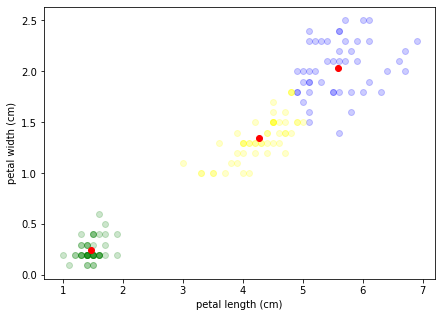

In [17]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3) 
model.fit(X_iris) 
clusters=model.predict(X_iris) 

plt.figure(figsize=(7,5))
plt.xlabel(iris["feature_names"][2])
plt.ylabel(iris["feature_names"][3])

plt.scatter(X_iris[clusters==0,0],X_iris[clusters==0,1],c='blue', alpha=0.2)
plt.scatter(X_iris[clusters==1,0],X_iris[clusters==1,1],c='green', alpha=0.2)
plt.scatter(X_iris[clusters==2,0],X_iris[clusters==2,1],c='yellow', alpha=0.2)

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red'); # クラスタの中心点
# print(model.inertia_) # コスト関数の値

## Q2 k-means法

### Q2.1
`scikit-learn`ライブラリの`KMeans`クラスを用いて、Q1で用いた都道府県の気象データについて**3つの**クラスタを抽出してクラスタリングの結果を可視化してください。

In [ ]:
from sklearn.cluster import KMeans

X = weather_df[['Temp', 'Rain']].values # データフレーム から配列に変換
X = (X-X.mean(axis=0))/X.std(axis=0) # 標準化

### KMeansモデルの学習ここから ###
model = ...
...
clusters = ...
### ここまで ###

# 可視化
plt.figure(figsize=(10,7))
plt.xlabel('normalized avg. temp. (degree Celsius)')
plt.ylabel('normalized avg. annual rainfall (mm)')
plt.scatter(X[clusters==0,0],X[clusters==0,1],c='blue')
plt.scatter(X[clusters==1,0],X[clusters==1,1],c='green')
plt.scatter(X[clusters==2,0],X[clusters==2,1],c='yellow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red'); # クラスタの中心点

コスト関数の値は$\simeq32.39$となります。

In [ ]:
# コスト関数の値
print(model.inertia_) 

In [ ]:
assert int(model.inertia_*100) == 3239

### Q2.2 平方ユークリッド距離

$n$-次元ベクトル空間における、任意の2つのベクトル、$ \vec{x}=(x_1,x_2,...,x_n)$、$\vec{y}=(y_1,y_2,...,y_n)$、の間の平方ユークリッド距離$ \| \vec{x}- \vec{y}\|^2$は以下のように定義されます。

$\Sigma^{n}_{i=1}(x_{i}-y_{i})^2=\vec{x}\cdot\vec{x}+\vec{y}\cdot\vec{y}-2\vec{x}\cdot\vec{y}$

入力ベクトル $\vec{x}$, $\vec{y}$ をそれぞれ`NumPy` の配列として引数で受け取り、それらのベクトル間の平方ユークリッド距離を計算して返す関数 `squared_euclid` を完成させてください。

In [ ]:
def squared_euclid(x, y):
    return ### ベクトル間の平方ユークリッド距離を計算するコード ###

### Q2.3 k-means法
以下では、k-means法によるクラスタリングを行う`kmeans`関数を実装します。`kmeans`関数では第1引数に入力`X`（データ数($m$)$\times$特徴量数($n$)の行列）、第2引数にクラスタ数を受け取り、以下の処理を行います。（引数には第3引数に中心への割り当てと中心点の更新の繰り返し数（既定値10）、第4引数に中心をランダムに選ぶ際のシード（既定値0）、を指定できますが省略可能です。）

- ***初期化***

まず、クラスタの数($K$)だけ中心を入力データからランダムに選び、それらを初期の中心$\mu^{(k)} (k=0,...,K-1)$とします。

- ***1. 中心への割り当て***

各データ$x^{(i)} (i=0,...,m-1)$と各中心$\mu^{(k)}$の平方ユークリッド距離を計算し、その結果を距離行列`d[i,k]`に代入します。距離行列`d`はデータを行、中心を列として、各データと各中心の距離を要素とする行列です。

距離行列`d[i,k]`の各行について、その行に対応するデータに最も近い中心をそのデータが属するクラスタの中心として選びます。これにより、各データ$x^{(i)}$がどのクラスタ中心$\mu^{(k)}$に属するかを表す以下の配列`clusters`を更新します。

データ$x^{(i)}$の最近接の中心が$\mu^{(k)}$であれば`clusters[i]=k`

この時、以下のように距離行列`d`の各行ごとにその行の最小値を持つ列のインデックスを`np.argmin`で取得することで配列`clusters`を作成できます。
```Python
clusters = np.argmin(d,axis=1)
```

- ***2. 中心の更新***

そして、各中心$\mu^{(k)}$に属するデータ$x^{(k,i)}$を用いて各中心を更新します

$\mu^{(k)}= \Sigma_{i} x^{(k,i)}/(\mu^{(k)}に属するデータ数)$

この時、`clusters`配列とインデックス参照を用いて、中心$\mu^{(k)}$に属するデータの特徴ベクトル集合を入力`X`から以下のように取得できます。
```Python
X[clusters==k,:]
```
これらの特徴ベクトルの平均のベクトル（ヒント:`np.mean`)を新たな中心$\mu^{(k)}$のベクトルとします。

k-means法では、上記のデータの中心への割り当てと中心の更新を繰り返すことで、クラスタリングを行います。繰り返し処理が終わったら、`kmeans`関数は、各データの所属するクラスタを表す配列`clusters`、各クラスタ中心のベクトルを行とする行列`centers`、最終的なコスト関数の値`cost`を返します。上記に従って、`kmeans`関数を完成させてください。

In [ ]:
def kmeans(X, n_clusters, max_iter=10, rand_seed=0): 
    ### 引数：
    # X: 入力データ（データ数x特徴量数の行列）
    # n_clusters: クラスタ数
    # max_iter: 中心への割り当てと中心の更新の繰り返し数
    # rand_seed: 中心をランダムに選ぶ際のシード
    
    # クラスタ数のだけ中心を入力データからランダムに選ぶ
        # 補: k-means++の場合は、この中心を選び方を変更
        # 補: また、クラスタ数が比較的小さい時は異なる初期中心を試し
        # 最終的にコストが小さくなる初期中心を採用するのがよい
    np.random.seed(rand_seed)    
    centers=X[np.random.choice(X.shape[0],n_clusters, replace=False),:]
    
    # 各特徴量ベクトルと中心点ベクトルの距離を表す2次元配列（入力データ数xクラスタ数）の初期化
    d = ...
    
    # 各データの所属するクラスタ（中心）を表す1次元配列の初期化
    clusters = ...
    
    # 以下をmax_iter回だけ繰り返し
        # 1. 中心への割り当て
        ### 入力データiの特徴量ベクトルと中心kのベクトルの平方ユークリッド距離を計算して、d[i,k]を更新するコード
        ###  各データiがどの中心kに属するかを表す配列clustersを更新（clusters[i]=k)するコード
        
        # 2. 中心の更新
        ### 中心kに属するデータiだけを用いて中心kのベクトルcenters[k,:]を更新するコード

    cost = np.sum((X - centers[np.argmin(d,axis=1),:])**2) # コストの計算
    #print(cost)
    
    return clusters, centers, cost 

`kmeans`関数が完成したら以下を実行して、上記の`scikit-learn`の`KMeans`を用いてえられたのと同様のクラスタリング結果がえられていることを確認してください（クラスタの色の割り当ては異なっていても構いません）。最終的なコスト関数の値は$\simeq36.6$となります。

In [ ]:
X = weather_df[['Temp', 'Rain']].values # データフレーム から配列に変換
X = (X-X.mean(axis=0))/X.std(axis=0) # 標準化
clusters, centers, cost=kmeans(X, 3)

# 可視化
plt.figure(figsize=(10,7))
plt.xlabel('normalized avg. temp. (degree Celsius)')
plt.ylabel('normalized avg. annual rainfall (mm)')
plt.scatter(X[clusters==0,0],X[clusters==0,1],c='blue')
plt.scatter(X[clusters==1,0],X[clusters==1,1],c='green')
plt.scatter(X[clusters==2,0],X[clusters==2,1],c='yellow')
plt.scatter(centers[:,0], centers[:,1], c='red'); # クラスタの中心点

In [ ]:
#コスト関数の値
print(cost)

In [ ]:
assert int(cost*100) == 3660

### Q2.4 エルボー法
クラスタリングにおいて、クラスタ数を変化させた時のクラスタリングのコストの変化に基づいて、最適なクラスタ数を決定する方法をエルボー法と呼びます。エルボー法では、クラスタ数を増やしていった時にコストが最も大きく減少する時のクラスタ数を採用します。以下の`elbow`関数は、Q2.2で作成した`kmeans`関数を用いて、クラスタ数を1から1つずつ増やしていった時のクラスタリングのコストの変化を可視化します。`elbow`関数を完成させてください。

Q1の都道府県の気象データについて、k-means法でクラスタリングするとコストが最も大きく減少するのはクラスタ数を1から2にした時であることがわかります。この時、コスト関数の値は約94から約53まで減少しています。特に全体を高温の地域と低温の地域の2つのクラスタとみなした時、全体のデータを大きく2つに識別でき、クラスタリングのコストが大きく減少しています。

In [ ]:
def elbow(X, K):
    ### 引数：
    # X: 入力データ
    # K: 最大のクラスタ数    
    
    # 各クラスタ数でのコストをいれるリスト
    costs=[]
    
    #1からKまでのクラスタ数kそれぞれで入力データを
    # kmeans法でクラスタリングした時の最終的なコストをcostsに追加するコード 
    ### kmeans関数の引数はkmeans(X, k)のように与える
    
    # クラスタ数 vs. コストの可視化 
    plt.xlabel("# of clusters")
    plt.ylabel("cost")
    plt.plot(# クラスタ数とコストを指定するコード);
    
    return costs

In [ ]:
X = weather_df[['Temp', 'Rain']].values # データフレーム から配列に変換
X = (X-X.mean(axis=0))/X.std(axis=0) # 標準化
costs = elbow(X, 10)

In [ ]:
assert int(costs[0]) == 94
assert int(costs[1]) == 53
assert int(costs[2]) == 36

In [ ]:
# クラスタ数2の場合
X = weather_df[['Temp', 'Rain']].values # データフレーム から配列に変換
X = (X-X.mean(axis=0))/X.std(axis=0) # 標準化
clusters, centers, cost=kmeans(X, 2)
plt.figure(figsize=(10,7))
plt.xlabel('normalized avg. temp. (degree Celsius)')
plt.ylabel('normalized avg. annual rainfall (mm)')
plt.scatter(X[clusters==0,0],X[clusters==0,1],c='blue')
plt.scatter(X[clusters==1,0],X[clusters==1,1],c='green')
plt.scatter(X[clusters==2,0],X[clusters==2,1],c='yellow')
plt.scatter(centers[:,0], centers[:,1], c='red'); # クラスタの中心点